In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-state-name-code-and-abbreviation/data.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv
/kaggle/input/2019-census-us-population-data-by-state/2019_Census_US_Population_Data_By_State_Lat_Long.csv


In [2]:
usa_population_data = pd.read_csv('../input/2019-census-us-population-data-by-state/2019_Census_US_Population_Data_By_State_Lat_Long.csv') 
us_pop = usa_population_data[['STATE', 'POPESTIMATE2019']].sort_values('STATE')

police_shootings = pd.read_csv('../input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv', encoding = 'Windows-1252')
kills_per_state = police_shootings.groupby('state').count()

statename_statecode = pd.read_csv('../input/usa-state-name-code-and-abbreviation/data.csv')
new_state_code = statename_statecode[['State', 'Code']]
new_state_code.columns = ['STATE', 'state']
merged_df = pd.merge(new_state_code,  us_pop, on = 'STATE')
kills_per_state = kills_per_state['id']
state_pop_kills = pd.merge(merged_df, kills_per_state, on = 'state')
del state_pop_kills['STATE']
state_pop_kills.columns = ['STATE', 'POPULATION', 'POLICE KILLINGS']


import matplotlib.pyplot as plt

state_pop_kills['POP_KILLS_RATIO'] = (state_pop_kills['POLICE KILLINGS']/state_pop_kills['POPULATION']) * 1e4
pop_kills_sorted = state_pop_kills.sort_values(by = 'POP_KILLS_RATIO', ascending = False)
pop_kills_sorted.loc[pop_kills_sorted['POPULATION'] < 1e6, 'POP_KILLS_RATIO'] = 0

pop_kills_sorted






,STATE,POPULATION,POLICE KILLINGS,POP_KILLS_RATIO
31,NM,2096829,51,0.243224
1,AK,731545,15,0.000000
36,OK,3956971,78,0.197120
2,AZ,7278717,118,0.162116
8,DC,705749,11,0.000000
48,WV,1792147,27,0.150657
50,WY,578759,8,0.000000
28,NV,3080156,42,0.136357
5,CO,5758736,74,0.128500
18,LA,4648794,57,0.122612


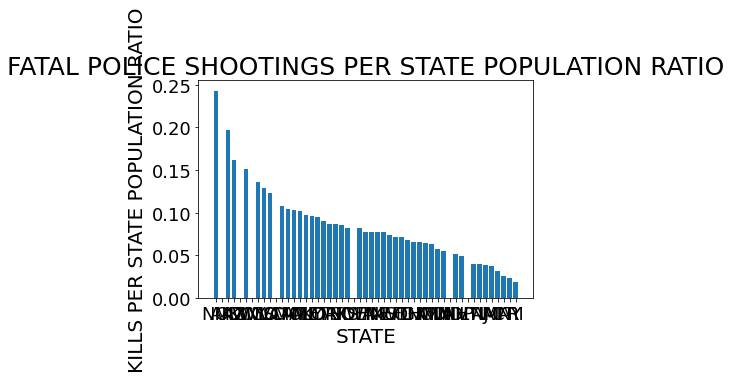

In [3]:
x = pop_kills_sorted['STATE']
y = pop_kills_sorted['POP_KILLS_RATIO']
plt.bar(x, y)
plt.rcParams["figure.figsize"] = (33,6)

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('STATE', size = 20)
plt.ylabel('KILLS PER STATE POPULATION RATIO', size = 20)
plt.title('FATAL POLICE SHOOTINGS PER STATE POPULATION RATIO', size = 25)
plt.show()



In [4]:
data = {'state': ['CA', 'CO'], 'value': [100, 150]}
state_df = pd.DataFrame(data)
state_df

,state,value
0,CA,100
1,CO,150


In [5]:
import plotly.express as px  # Be sure to import express

fig = px.choropleth(pop_kills_sorted,  # Input Pandas DataFrame
                    locations = "STATE",  # DataFrame column with locations
                    color = "POP_KILLS_RATIO",  # DataFrame column with color values
                    hover_name = "STATE", # DataFrame column hover info
                    locationmode = 'USA-states',
                    color_continuous_scale = 'reds') # Set to plot as US States
fig.update_layout(title_text = 'State Rankings',geo_scope='usa'  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen